In [1]:
from reservoir_rls import *
import matplotlib.pyplot as plt
from lorenz63 import *
from scipy.signal import welch, periodogram

In [2]:
step = 0.05
start_time = 125
sync_length = 200
num_tests = 500
train_length = 800
pred_length = 400
base_data_length = int(start_time/step)
data_length = int(base_data_length * step/(0.01))+pred_length
r_t = lambda x: r_t_cosine(x)
dxdt = lambda x,t,r_t: dxdt_lorenz(x,t,r_t)

num_tests = 100
"""
with tqdm(total = num_tests) as pbar:
    for seed in range(num_tests):
        data = getLorenzData(data_length, r_t, dxdt, sample_tau = step, seed = seed)
        if seed == 0:
            optim_data = data[-sync_length - train_length - pred_length:]
        else:
            optim_data = np.vstack((optim_data, data[-sync_length - train_length - pred_length:]))
        pbar.update(1)
print(optim_data.shape)

# scaler = preprocessing.StandardScaler().fit(data)
# scaled_data = scaler.transform(data)
scaled_data = np.copy(optim_data)
scaled_data = np.ascontiguousarray(scaled_data)
"""
scaled_data = np.loadtxt('cos_lorenz_data_separated.csv', delimiter = ',')

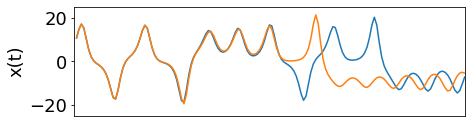

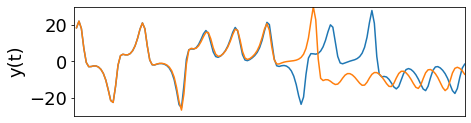

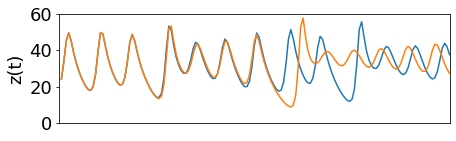

1000


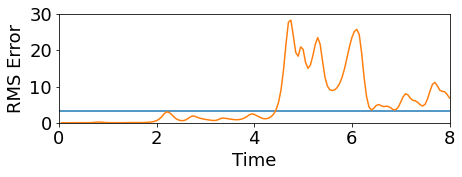

[400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400.
 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400.
 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400.
 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400.
 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400.
 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400.
 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400.
 400. 400.]


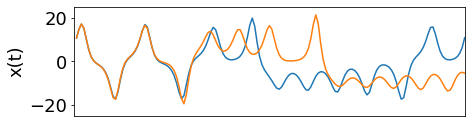

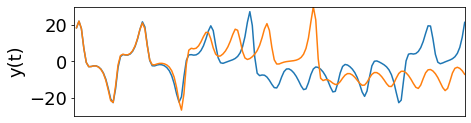

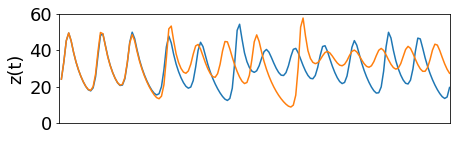

1000


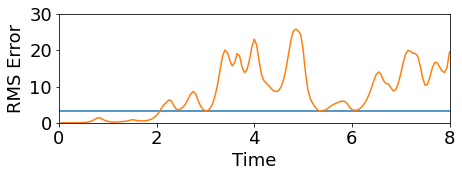

[400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400.
 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400.
 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400.
 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400.
 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400.
 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400.
 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400.
 400. 400.]


In [3]:
num_nodes = 210
res_seed = 1
cma_es_result = np.array([0.2*(4.924892e+00-5), 10**(-8.768116e+00-3), 1-10**(-0.5*1.024669e+00-1)])
res1 = reservoir(3,num_nodes, input_weight = cma_es_result[0], \
                    regularization = cma_es_result[1], \
                    forget = cma_es_result[2], seed = res_seed)
cma_es_results = cross_validation_performance_separated(scaled_data, res1, \
    num_tests, sync_length, train_length, pred_length, \
    errormax = 1000, train_method = 'Normal', progress = False, plot = True, plot_idx = 24)
print(cma_es_results)

cma_es_result_nf = np.array([0.2*(5.139071e+00-5), 10**(-7.276314e+00-3), 1.])
res1 = reservoir(3,num_nodes, input_weight = cma_es_result_nf[0], \
                    regularization = cma_es_result_nf[1], \
                    forget = cma_es_result_nf[2], seed = res_seed)
cma_es_results_nf = cross_validation_performance_separated(scaled_data, res1, \
    num_tests, sync_length, train_length, pred_length, \
    errormax = 1000, train_method = 'Normal', progress = False, plot = True, plot_idx = 24)
print(cma_es_results_nf)

In [6]:
print(cma_es_results - cma_es_results_nf)
idx = 22
print(cma_es_results[idx])
print(cma_es_results_nf[idx])


[ 27.  13.  35.  14.  -2.  36.   0.   0.   4.  62.  12.  47. -15.  27.
  25.  19. -10.   1.  -2.  51.  13.  11.  35. -32.  47.  -4.   0.  11.
  13.  13.  24.  40.   1.   0. -13.   0.  23.  14. -10.  62.  15.   0.
  25.   2.  38. -13.  12.   2.  12. -11.  39.  23.   0.  29.  23.  16.
   1.  51.  28.  12.  52.  -1.  -1.   3.   0.   3.  27.  27.  -4.   0.
  50.  -2.   4.  63.   2.  12.   2.   2.  26.   0.   0.  37.  24.   2.
  51.   0. -34.  23.  38.  27.  24.  41.  49.  28.  -3. -11. -10.  14.
  -4. -26.]
71.0
36.0


In [4]:
ross_cmaes_res = np.array([0.2*(5.291291e+00-5), 10**(-3.835728e+00-3), 1-10**(-0.5*4.003431e+00-1)])
print(ross_cmaes_res)

[5.82582000e-02 1.45972821e-07 9.99003942e-01]


In [65]:
num_nodes = 210
num_tests = 100
train_length = 800
sync_length = 200
pred_length = 400
res_seed = 1
input_weights = np.linspace(-1,1,25)
regularizations = np.logspace(-13,-3,11)
forgets = np.array([0.97])

vts = np.zeros((input_weights.size,regularizations.size,forgets.size))
with tqdm(total = vts.size) as pbar:
    for i, weight in enumerate(input_weights):
        for k, regularization in enumerate(regularizations):
            for m, forget in enumerate(forgets):
                res1 = reservoir(3,num_nodes, input_weight = weight, \
                    regularization = regularization, \
                    forget = forget, seed = res_seed)
                results = cross_validation_performance_separated(scaled_data, res1, \
                    num_tests, sync_length, train_length, pred_length, \
                    errormax = 3.2, train_method = 'Normal', progress = False)
                vts[i,k,m] = np.median(results)
                pbar.update(1)

100%|████████████████████████████████████████████████████████████████████████████████| 275/275 [11:24<00:00,  2.49s/it]


In [67]:
print(np.where(vts == np.max(vts)))
print(np.max(vts))

(array([11, 13], dtype=int64), array([8, 8], dtype=int64), array([0, 0], dtype=int64))
25.5


In [6]:
num_nodes = 210
res_seed = 1
base_res = reservoir(3,num_nodes,input_weight = 1, spectral_radius = 1, seed = res_seed)
mask = ['input_weight','regularization','forget']
min_func = lambda x: vt_min_function_norm(scaled_data, x, mask, base_res.Win, base_res.A, \
     num_tests = num_tests,  num_nodes = num_nodes, pred_length = pred_length, train_length = train_length,
     separated = True)

weights = np.linspace(4.8,5.2,25)
forgets = np.linspace(0.5,4,25)
best_reg = 8.768116e+00
vt_slice = np.zeros((weights.size,forgets.size))
for i, weight in enumerate(weights):
    for j, forget in enumerate(forgets):
        vt_slice[i,j] = min_func(np.array([weight, best_reg, forget]))
np.savetxt('vt_cos_starttime125_best_reg_cma.csv',vt_slice, delimiter = ',')

In [7]:
num_nodes = 210
res_seed = 1
base_res = reservoir(3,num_nodes,input_weight = 1, spectral_radius = 1, seed = res_seed)
mask = ['input_weight','regularization','forget']
min_func = lambda x: vt_min_function_norm(scaled_data, x, mask, base_res.Win, base_res.A, \
     num_tests = num_tests,  num_nodes = num_nodes, pred_length = pred_length, train_length = train_length,
     separated = True)

regs = np.linspace(6,9.5,25)
forgets = np.linspace(0.5,4,25)
best_weight = 4.924892e+00
vt_slice = np.zeros((regs.size,forgets.size))
for i, reg in enumerate(regs):
    for j, forget in enumerate(forgets):
        vt_slice[i,j] = min_func(np.array([best_weight, reg, forget]))
np.savetxt('vt_cos_starttime125_best_weight_cma.csv',vt_slice, delimiter = ',')

c:\users\alexander\anaconda3\envs\reservoir-rls\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


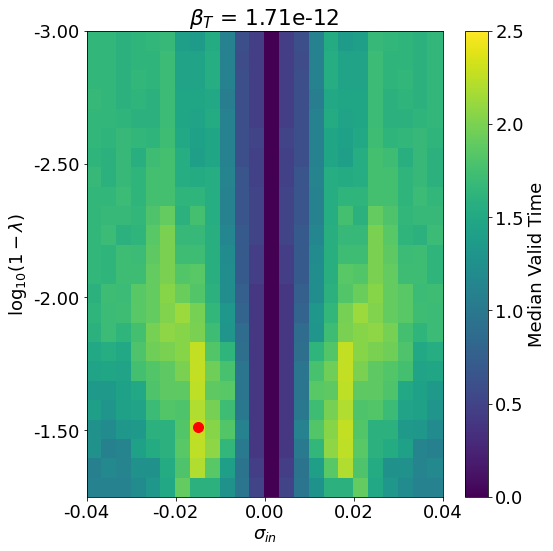

In [46]:
plt.rcParams.update({'font.size': 18})

vt_slice = np.loadtxt('vt_cos_starttime125_best_reg_cma.csv', delimiter = ',')
cma_es_result = np.array([4.924892e+00, 8.768116e+00, 1.024669e+00])
weights = np.linspace(4.8,5.2,25)
forgets = np.linspace(0.5,4,25)

xticks = np.array([4.8,4.9,5.,5.1,5.2])
xlabels = ['%0.2f' % i for i in 0.2*(xticks - 5)]
yticks = np.array([1.,2.,3.,4.])
ylabels = ['%0.2f' % i for i in -0.5*yticks - 1] 

fig = plt.figure(figsize = (8,8))
plt.pcolor(weights, forgets, -vt_slice.T*0.05)
plt.plot([cma_es_result[0]], [cma_es_result[2]], 'r.', markersize = 20)
plt.xticks(xticks, xlabels)
plt.yticks(yticks, ylabels)
plt.xlabel(r'$\sigma_{in}$')
plt.ylabel(r'$\log_{10}(1-\lambda)$')
cbar = plt.colorbar()
cbar.set_label('Median Valid Time')
plt.clim(0,2.5)
plt.title(r'$\beta_T$ = %0.2e' % 10**(-cma_es_result[1]-3))
plt.tight_layout()

plt.savefig('cmaes_landscape_bestreg_cos.png')
plt.show()

c:\users\alexander\anaconda3\envs\reservoir-rls\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


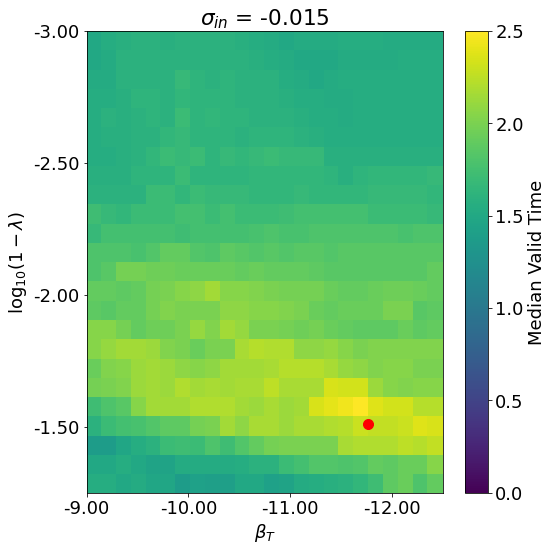

In [47]:
plt.rcParams.update({'font.size': 18})

vt_slice = np.loadtxt('vt_cos_starttime125_best_weight_cma.csv', delimiter = ',')
cma_es_result = np.array([4.924892e+00, 8.768116e+00, 1.024669e+00])
regs = np.linspace(6,9.5,25)
forgets = np.linspace(0.5,4,25)

xticks = np.array([6.,7.,8.,9.])
xlabels = ['%0.2f' % i for i in (-xticks - 3)]
yticks = np.array([1.,2.,3.,4.])
ylabels = ['%0.2f' % i for i in -0.5*yticks - 1] 

fig = plt.figure(figsize = (8,8))
plt.pcolor(regs, forgets, -vt_slice.T*0.05)
plt.plot([cma_es_result[1]], [cma_es_result[2]], 'r.', markersize = 20)
plt.xticks(xticks, xlabels)
plt.yticks(yticks, ylabels)
plt.xlabel(r'$\beta_T$')
plt.ylabel(r'$\log_{10}(1-\lambda)$')
cbar = plt.colorbar()
cbar.set_label('Median Valid Time')
plt.clim(0,2.5)
plt.title(r'$\sigma_{in}$ = %0.3f' % (0.2*(cma_es_result[0]-5.)))
plt.tight_layout()
plt.savefig('cmaes_landscape_bestweight_cos.png')
plt.show()

[-32.5 -33.  -40.  -38.5 -34.5 -35.  -43.5 -39.  -39.  -41.5 -45.5 -44.
 -42.5 -44.  -47.  -47.5 -46.  -47.5 -44.5 -47.  -44.  -47.5 -44.5 -43.5
 -46.5 -44.5 -45.  -44.5 -43.  -49.  -49.  -46.  -43.  -47.5 -50.  -50.
 -49.5 -48.5 -49.5 -50.  -50.  -50.  -50.  -50.  -50.  -50.  -50.  -50.
 -50.  -50.  -50.  -50. ]


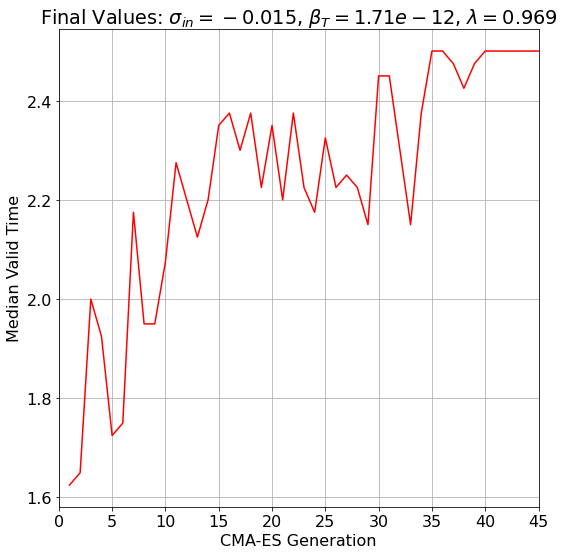

In [71]:
import pandas as pd
fit_data = pd.read_csv('cmaes_norm_cos_wforget_moresamples_starttime125_res1/fit.dat',sep = ' ', header = None, skiprows = [0]).to_numpy()[:,5]
print(fit_data)
cma_es_result = np.array([4.924892e+00, 8.768116e+00, 1.024669e+00])
plt.rcParams.update({'font.size': 16})

fig = plt.figure(figsize = (8,8))
plt.plot(np.arange(1,46,dtype = int), -fit_data[:45]*0.05, 'r')
plt.xlabel('CMA-ES Generation')
plt.ylabel('Median Valid Time')
plt.grid()
plt.xlim(0,45)
# plt.ylim(32.5,50.5)
plt.title(r'Final Values: $\sigma_{in} = %0.3f$, $\beta_T = %0.2e$, $\lambda = %0.3f$' % \
         (0.2*(cma_es_result[0]-5), 10**(-cma_es_result[1]-3), 1-10**(-0.5*cma_es_result[2]-1)))
plt.tight_layout()

plt.savefig('cmaes_cos_result.png')
plt.show()

In [1]:
step = 0.05
start_time = 125
sync_length = 200
num_tests = 500
train_length = 800
pred_length = 400
seed = 25
base_data_length = int(start_time/step)
data_length = int(base_data_length * step/(0.01))+pred_length
r_t = lambda x: r_t_cosine(x)
dxdt = lambda x,t,r_t: dxdt_lorenz(x,t,r_t)

num_tests = 100
with tqdm(total = num_tests) as pbar:
    for seed in range(num_tests):
        data = getLorenzData(data_length, r_t, dxdt, sample_tau = step, seed = seed)
        if seed == 0:
            optim_data = data[-sync_length - train_length - pred_length:]
        else:
            optim_data = np.vstack((optim_data, data[-sync_length - train_length - pred_length:]))
        pbar.update(1)
print(optim_data.shape)

# scaler = preprocessing.StandardScaler().fit(data)
# scaled_data = scaler.transform(data)
scaled_data = np.copy(optim_data)
scaled_data = np.ascontiguousarray(scaled_data)

NameError: name 'tqdm' is not defined

In [12]:
res1 = reservoir(3,num_nodes, input_weight = best_weight, regularization = best_regularization, \
                     forget = best_forget, seed = res_seed)
results = cross_validation_performance_separated(scaled_data, res1, num_tests, sync_length, train_length, pred_length, \
     errormax = 3.2, train_method = 'Normal', progress = False)

print('Test Valid Time: %f' % np.median(results))

Test Valid Time: 35.000000
